# Padaria Portugesa Geolocation

In [240]:
# classic import
import pandas as pd
from shapely.geometry import Polygon, Point
import geopandas as gp
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore')

In [241]:
# open data
freguesias = gp.read_file('data/freguesias.shp')
padarias = pd.read_csv('data/padarias.csv', index_col=0)

# there were two duplicated restaurants in the same location
padarias.drop_duplicates(subset='restaurant.name', inplace=True)

In [243]:
# change projection to 2D in meters
freguesias = freguesias.to_crs('EPSG:3763')

In [244]:
# transform Zomato data into GeoDataFrame
padarias = gp.GeoDataFrame(padarias, geometry=gp.points_from_xy(padarias['restaurant.location.longitude'], padarias['restaurant.location.latitude']))

# transform from naive coordinates to the actual CRS system they are in.
padarias.crs = {'init' :'epsg:4326'}

# re-project to the same as the Lisbon map
padarias = padarias.to_crs('EPSG:3763')

In [245]:
# remove points outside the city
padarias = padarias[padarias.geometry.within(freguesias.unary_union)]

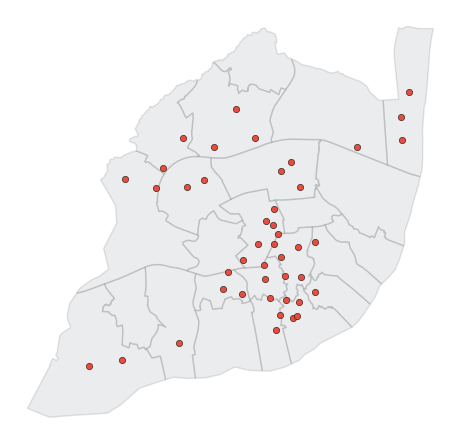

In [256]:
# plot base map and restaurant locations
base = freguesias.plot(figsize=(6, 6), facecolor='#34495e', edgecolor='black', linewidth= 1.5, alpha=.1)
points.plot(ax=base, marker='o', color='#e74c3c', markersize=40, edgecolor='k', linewidth=.5)
base.axis('off');
plt.savefig('figures/basemap_locations.png', dpi=100)

In [334]:
circles = points.buffer(500)

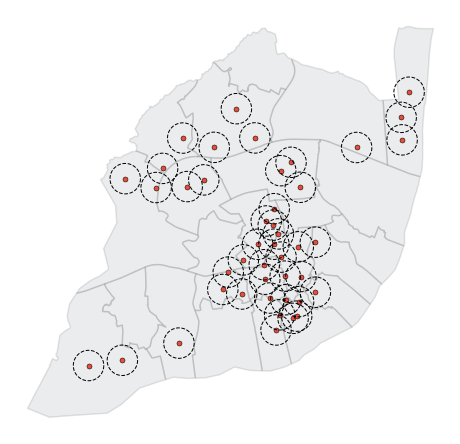

In [335]:
base = freguesias.plot(figsize=(8, 8), facecolor='#34495e', edgecolor='black', linewidth= 1.5, alpha=.1)
points.plot(ax=base, marker='o', color='#e74c3c', markersize=25, edgecolor='k', linewidth=.5)
gp.GeoSeries(circles).plot(ax=base, facecolor='none', edgecolor='k', lw=1, ls='dashed')
base.axis('off');


In [264]:
difference = gp.GeoSeries(circles.intersection(freguesias.unary_union))

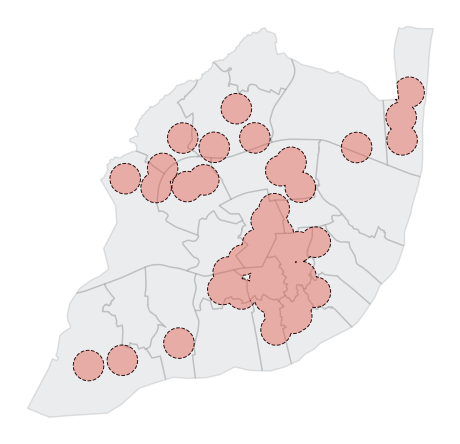

In [332]:
base = freguesias.plot(figsize=(6, 6), facecolor='#34495e', edgecolor='black', linewidth= 1.5, alpha=.1)
difference.plot(ax=base, facecolor='none', edgecolor='k', lw=1, ls='dashed')
difference.plot(ax=base, facecolor='#e74c3c', alpha=.4)
base.axis('off');
plt.savefig('figures/area_difference.png', dpi=100)

In [342]:
intersection = freguesias.unary_union.intersection(circles.unary_union)
area_covered = intersection.area/freguesias.unary_union.area

In [343]:
area_covered

0.25045033318728566

In [338]:
intersections_all = freguesias['geometry'].intersection(circles.unary_union)

In [339]:
intersections_all.area/freguesias.area

0     0.976288
1     0.392177
2     0.032862
3     0.002292
4     0.205692
5     0.402034
6     0.396081
7     0.149776
8     0.045984
9     0.950913
10    0.000000
11    0.673049
12    0.273405
13    0.417908
14    0.000000
15    0.186783
16    0.154517
17    0.677757
18    0.302871
19    0.068017
20    0.485132
21    0.351272
22    0.225042
23    0.171418
dtype: float64

In [222]:
freguesias.NOME

0               Santo António
1           Parque das Nações
2                     Marvila
3                       Ajuda
4                     Areeiro
5           Santa Maria Maior
6                    Alvalade
7                       Belém
8                     Estrela
9                     Arroios
10                Santa Clara
11             Avenidas Novas
12                    Carnide
13    São Domingos de Benfica
14                      Beato
15                  Campolide
16                  Alcântara
17           Campo de Ourique
18                São Vicente
19                    Olivais
20               Misericórdia
21                     Lumiar
22            Penha de França
23                    Benfica
Name: NOME, dtype: object

In [307]:
population = pd.read_csv('data/populacao-freguesias.csv', sep=';', engine='python', header=None, usecols=[1, 3, 4], names=['CODIGO','NOME', 'POP'])

In [312]:
population = population[(population['CODIGO'] == "'1106'") & (population['NOME'] != 'Lisboa')].reset_index()

In [321]:
freguesias['POP'] = np.where(freguesias['NOME'] == population['NOME'], population['POP'], population['POP'])

In [323]:
freguesias

,OBJECTID,COD_SIG,NOME,IDTIPO,PERIMETRO,AREA_M2,FREGUESIAS,GlobalID,Shape__Are,Shape__Len,geometry,POP
0,1,122,Santo António,4015,6313.94,1494348.58,Coração de Jesus + São José + São Mamede,884c79cb-a70a-4107-aa51-986598465f73,2.458057e+06,8097.074172,"POLYGON ((-87984.966 -103872.522, -87910.453 -...",15617
1,2,118,Parque das Nações,4015,12237.24,5435124.30,Santa Maria dos Olivais,773f4b4b-4e67-4b98-a135-14ba7985edb9,8.953807e+06,15724.284710,"POLYGON ((-83625.133 -96313.225, -83623.619 -9...",13943
2,3,115,Marvila,4015,12216.54,7122521.90,Marvila,7e11d378-03be-4890-937b-6c8903a33d7d,1.172476e+07,15674.400259,"POLYGON ((-86269.606 -100086.568, -86239.316 -...",12737
3,4,101,Ajuda,4015,9153.10,2876647.11,Ajuda,263a2abb-b73f-43b1-9c70-beb08b8f34bf,4.730508e+06,11740.588160,"POLYGON ((-92184.401 -105165.004, -92179.992 -...",36985
4,5,104,Areeiro,4015,6358.83,1719002.47,Alto do Pina + São João de Deus,97a38bba-54e6-4463-bede-05039f2e8a28,2.829203e+06,8153.225327,"POLYGON ((-86130.161 -102737.641, -86220.902 -...",15460
5,6,121,Santa Maria Maior,4015,9306.07,3011591.52,Castelo + Madalena + Mártires + Sacramento +Sa...,661e72e3-05c3-40c6-bfe2-016625e57f09,4.952034e+06,11936.070712,"POLYGON ((-87136.353 -104822.699, -87131.692 -...",19218
6,7,103,Alvalade,4015,10751.30,5341751.02,Alvalade + Campo Grande + São João de Brito,6b83acaa-ef58-4c4d-bd16-a71cf1964d7c,8.794657e+06,13786.968033,"POLYGON ((-86521.321 -100028.836, -86522.877 -...",45605
7,8,108,Belém,4015,16050.78,10426948.88,Santa Maria de Belém + São Francisco Xavier,0fb03b7f-2393-4294-a4b5-9b2ad20e29ce,1.713895e+07,20577.231795,"POLYGON ((-93305.184 -105254.426, -93331.293 -...",37793
8,9,113,Estrela,4015,9927.92,4604095.97,Lapa + Prazeres + Santos-o-Velho,039f27c5-37e5-4367-9911-ccd96a50f6bc,7.569528e+06,12734.386771,"POLYGON ((-89382.497 -105267.782, -89377.497 -...",33788
9,10,105,Arroios,4015,8240.38,2127871.88,Anjos + Pena + São Jorge de Arroios,11eb9fde-21a8-4a20-975f-4278ba5900b9,3.500783e+06,10572.552949,"POLYGON ((-86951.029 -103668.470, -86955.929 -...",33043
